##### The task presented is a classification task  for DeltaSquare an NGO that works with the Government on matters of social policy to bring about a change in the lives of underprivileged sections of society. 

##### To enable them come up with a policy framework, I will be working with the WHO data and present my recommendations

In [204]:
# Libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from utils import histogram_boxplot, labeled_barplot

# split to train and test
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (precision_score, 
                             recall_score, 
                             f1_score,
                             accuracy_score,
                             precision_recall_curve,
                             roc_auc_score,
                             ConfusionMatrixDisplay,
                             confusion_matrix,
                             roc_curve)

from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

##### Loading the data

In [205]:
path = r"C:\Users\USER\Desktop\APPLIED ALLIED PYTHON AND AI TUTORIAL\Machine Learning\who_data.csv"

In [206]:
data = pd.read_csv(path) # reading the csv file in pandas

In [207]:
#check the first 5 rows of the data
data.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##### Data Exploration

In [208]:
data['workclass'].value_counts() #counts

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

Observations
- From the above there are 1836 number of people with unknown workclass

In [209]:
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

Observations
- From the above, there are 1843 people with unknown occupation

In [210]:
data['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [211]:
data['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [212]:
data['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [213]:
data['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [214]:
data['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [215]:
data['native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Observations
- From the above there are 583 number of people with unknown countrys

In [216]:
occ = data[data['occupation'] == ' ?'] # checking the the unknown occupation data 

In [217]:
occ['salary'].value_counts()

 <=50K    1652
 >50K      191
Name: salary, dtype: int64

In [218]:
occ['occupation'].value_counts()

 ?    1843
Name: occupation, dtype: int64

In [219]:
# check the shape of the data
print(f' The data have {data.shape[0]} rows and {data.shape[1]} columns')

 The data have 32561 rows and 15 columns


- From the above columns list and my observation made, I don't want to assume figures for the unknown ocuppation, working class and country.
- Individuals tend not to disclose these data due to tax evasion, illegal stay in the country, Money laundering and non-consent.
- These numbers are not significant and i will drop the rows where this issue occurs

In [220]:
# make copy of the data
df = data.copy() 

In [221]:
# drop rows with'?'
df['occupation'] = df['occupation'].replace(' ?', np.nan)
df['workclass'] = df['workclass'].replace(' ?', np.nan)
df['native_country'] = df['native_country'].replace(' ?', np.nan)

In [222]:
df.dropna(inplace=True)

In [223]:
# check the shape of the df
print(f' The data have {df.shape[0]} rows and {df.shape[1]} columns')

 The data have 30162 rows and 15 columns


In [224]:
# get the statistics of the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,30162.0,NaN,NaN,NaN,38.437902,13.134665,17.0,28.0,37.0,47.0,90.0
workclass,30162,7,Private,22286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,30162.0,NaN,NaN,NaN,189793.83393,105652.971529,13769.0,117627.25,178425.0,237628.5,1484705.0
education,30162,16,HS-grad,9840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_no_of_years,30162.0,NaN,NaN,NaN,10.121312,2.549995,1.0,9.0,10.0,13.0,16.0
marital_status,30162,7,Married-civ-spouse,14065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,30162,14,Prof-specialty,4038,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,30162,6,Husband,12463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,30162,5,White,25933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,30162,2,Male,20380,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### From the data more people have salarys less than or equal to 50k

- 29,170 people are from the united states
- The capial loss and capital gain are greater than the median making them right skewed

In [225]:
# encoding  <= 50 to 1 and > 50 as 0
df['salary'].replace({' <=50K': 1, ' >50K': 0}, inplace = True)

# cast to integer
df['salary'] = df['salary'].astype(int)

###### The Salaries are of two classes, less than or equal to 50, greater than or equal to 50

In [226]:
duplicate = df.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 23 duplicated rows in the data


In [227]:
# drop the duplicate
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

#####  Visualization

In [228]:
columns = list(df)[:-1]

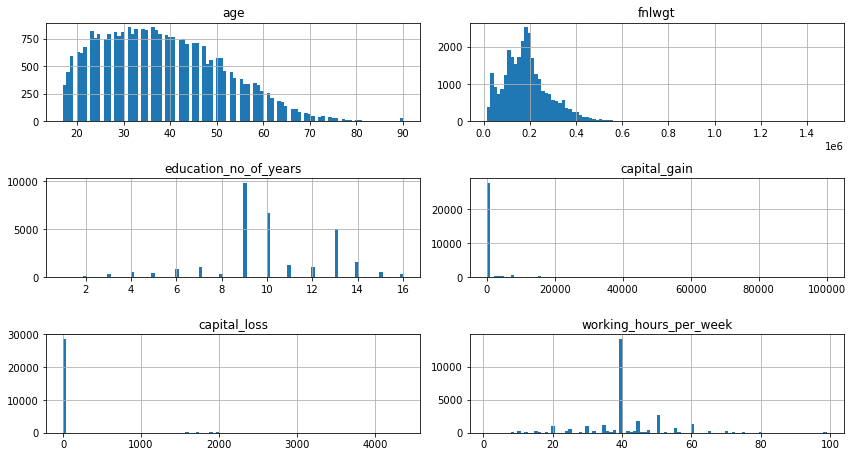

In [229]:
df[columns].hist(stacked = False, bins = 100, figsize=(12,30),
                  layout=(14,2));
plt.tight_layout()

#### Observations
- The workforce age is between the ages of 25 and 40years (More people in this age bracket work)
- The number of education years are >= 8years, more people tend to further their studies
- The capital loss and capital gain are mostly 0. Showiing that the individuals are neither in loss nor gain
- the average hours of work is 40hrs as shown in the graph, more people work 40hrs per week 

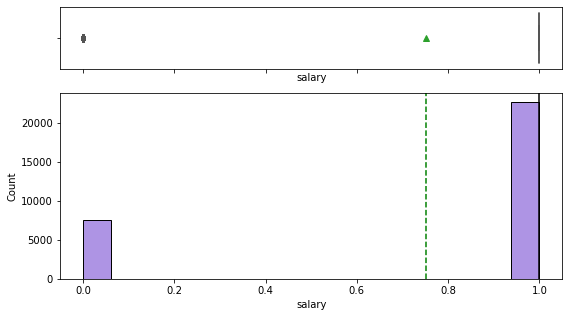

In [230]:
histogram_boxplot(data = df, feature='salary')


- From the above graph the number of people that earns <= 50k are higher than > 50k
- This shows that the class has imbalance data

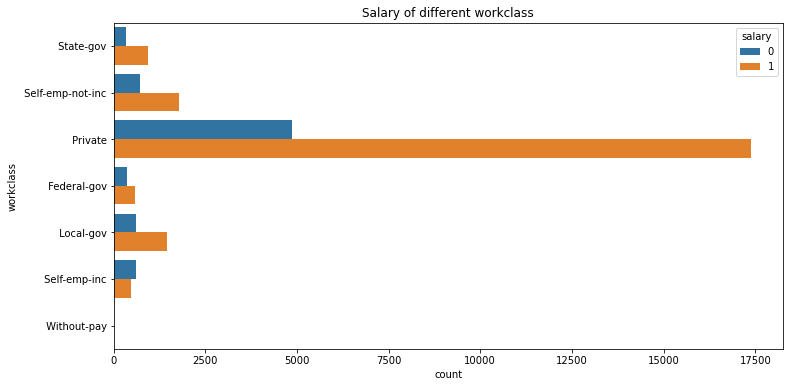

In [231]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y="workclass", hue="salary")

plt.title('Salary of different workclass');

##### Observation
- The number of people working for a private organization are more than other workclass
- Individuals who earn more than 50k are from the Private sector, this has effect on the salary

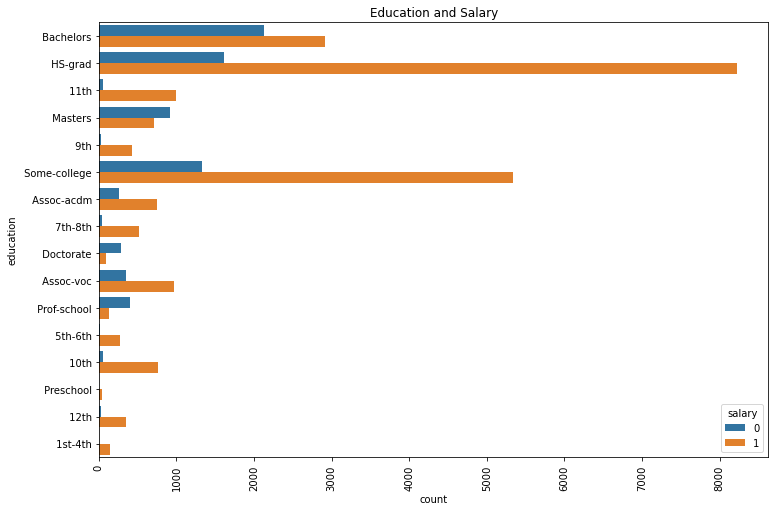

In [232]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, y="education", hue="salary")
plt.xticks(rotation = 90)
plt.title('Education and Salary');


##### Observations
- Education has effect on salary
- Individuals with Bachelors, HS-grad, Masters and college have people that earns >50k


<AxesSubplot:>

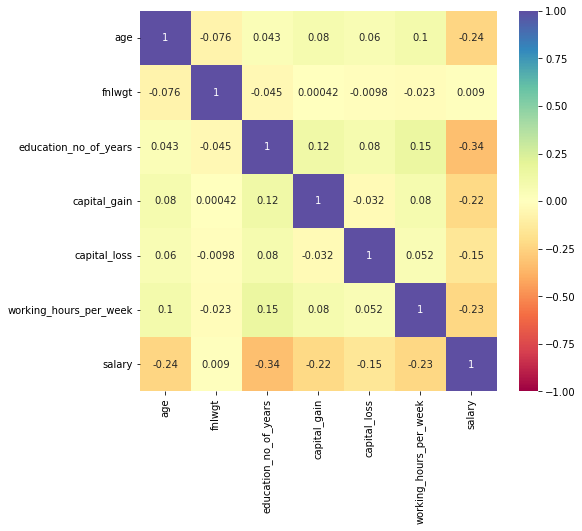

In [233]:
# plot a heatmap of the corr
plt.figure(figsize=(8,7))
sns.heatmap(df_corr, annot=True, vmin = -1, vmax=1, cmap = 'Spectral')

- from the above, I observed that fnlwgt has no effect on the salary
- None of the independent variable have a correlation > 0.5. 
- Education years have more effect on salary than the rest, based on the value from the heatmap

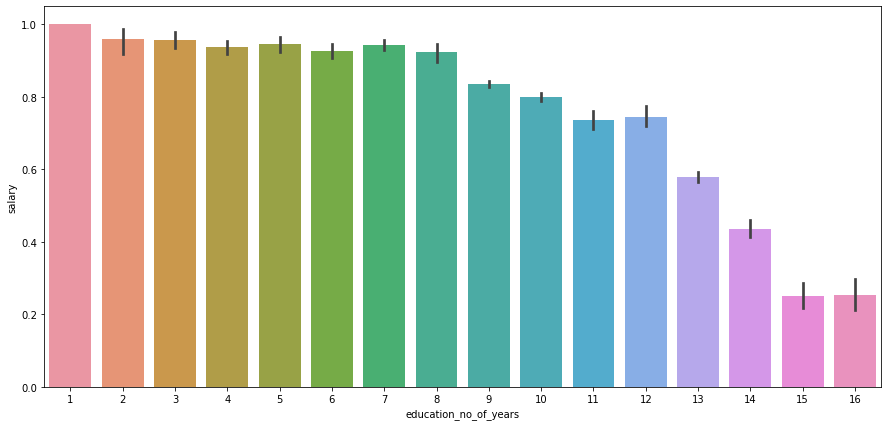

In [234]:
plt.figure(figsize = (15,7))
sns.barplot(y='salary', x= 'education_no_of_years', data =df)
plt.show()

#### Observations
- Salary tends towards >50k with a increase in the number of education years. There is a linearity between salary and education number of years

##### Splitting the data to train, test and validation

In [235]:
# df.head()
df_num = df.select_dtypes(exclude ='object') # obtains the numerical data type
df_ob = df.select_dtypes(include = 'object') # obtains all the datatypes that are objects

##### Independent variables that have effect on the salary are:
- age
- workclass
- education_no_of_years
- working_hours_per_week
- capital_loss
- capital_gain

#### excluding 'fnlwgt' because it has no effect on salary as shown in the correlation chart

In [236]:
#df.columns

In [237]:
X = df[['workclass','age','education_no_of_years','working_hours_per_week', 'capital_loss','capital_gain']]
y = df['salary']

In [238]:
X = pd.get_dummies(X, drop_first=True) # one hot encoding the work class

In [239]:
X.shape, y.shape# checking the shape of both the X and y variables

((30139, 11), (30139,))

In [240]:
# split into train, validation and test data

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,
                                                           random_state= 0,
                                                           stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                 y_train_val,
                                                 test_size=0.2,
                                                 random_state=0,
                                                 stratify=y_train_val)
# stratify splits the data and maintain the proportion of both classes in classification

In [241]:
X_train_val.shape, X_test.shape, y_train_val.shape, y_test.shape

((24111, 11), (6028, 11), (24111,), (6028,))

##### Functions that train and evaluate the models

In [242]:
# function to train a model and compute train accuracy

def train(model, X,y):
    """
    Function to train the model and compute accuracy
    
    model: Model algorithm not yet traineed
    X: train feaures
    y: train target
    """
    
    trained_model = model.fit(X,y)
    preds = trained_model.predict(X)
    acc = accuracy_score(y, preds)
    
    print(f'Trained Accuracy: {acc}')
    return trained_model


# function to evaluate the model and compute metrics on test data
def evaluate(model,X,y, threshold = 0.5): # the higher the thres the more strict u are, y can be validation or test data
    """
    function to evaluate our trained model with different metrics
    
    model: trained model(classifier)
    X: validation features
    y: target in validation data
    
    threshold: values to filter predictions
    """
    
    pred_proba = model.predict_proba(X)[:, 1] # it predicts two columns but we are interested in the 1class (True)
    pred_class = np.round(pred_proba > threshold) # convert to 0 or 1
    acc = accuracy_score(y, pred_class)
    recall = recall_score(y, pred_class)
    precision = precision_score(y, pred_class)
    f1 = f1_score(y, pred_class)
    
    df = pd.DataFrame({
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1": f1
    }, index =[0])
    
    conf = confusion_matrix(y, pred_class, labels=[0,1]) # confusion matrix
    disp = ConfusionMatrixDisplay(conf, display_labels=[0,1])
    disp.plot()
    plt.show()
    
    return df

##### Normilization

In [243]:
# creating an instance of the Normalization
scaler = MinMaxScaler()

In [244]:
# scaling the data
X_train_val_sc = scaler.fit_transform(X_train_val)
X_test_sc = scaler.transform(X_test)

##### Building the model

In [245]:
log_reg = LogisticRegression(random_state=0)

In [246]:
# check train accuracy
log_reg_model = train(log_reg,X_train_val_sc, y_train_val ) # model with training sample

Trained Accuracy: 0.8080544149973041


- From the above the trai data has an accuracy of 81%

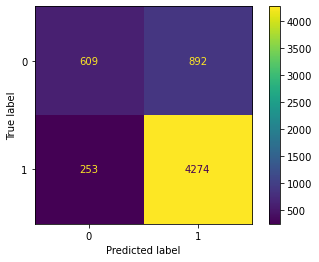

,Accuracy,Precision,Recall,F1
0,0.810053,0.827333,0.944113,0.881874


In [247]:
eva_log =evaluate(log_reg_model, X_test_sc, y_test) # evaluation of the model
eva_log

#### From the confusion matrix

- Out of 4527 working class people, the model incorrectly predicted that 253 earns > 50k and correctly predicted 4274 earns <= 50k

- There are 1501 who earn > 50k and the model is predicting that 894 of them earns <=50k salary

- Precision: Out of the number of people the model predicted to earn <=50k the model predicted 83% correctly

- Recall: Out of all the people in the data that earns <=50k the model predicted only 94% correctly

The aim is to build a model that can predict the number of people that earns less than 50k for the organization


#### Model Improvement
- Metrics
- Here we are considering a situation where the TP rates are far from the FP rates

In [248]:
# define a function for ROC and AUC curves to get the best threshold
def droc_curve(model, X, y):
    """
    Function to create ROC Curve
    
    model: trained model
    X: test or validaton features
    y: target in the test data
    """
    preds = log_reg.predict_proba(X_test_sc)[:,1]
    auc = roc_auc_score(y_test, preds)
    fpr, tpr, thre = roc_curve(y_test,preds)

    plt.figure(figsize=(7,5))
    plt.plot(fpr,tpr,label = f'Logistic regression {auc:.2f}')

    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim(0.0,1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel ("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc = 'lower right')
    plt.show()
    
    return thre, tpr, fpr # threshold
# using the threshold to tweak the model

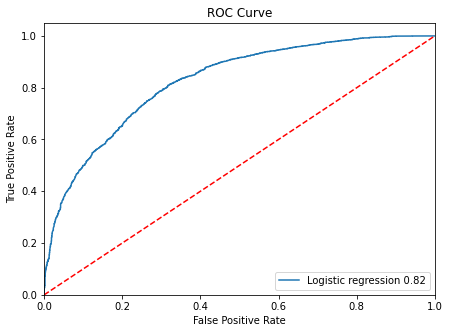

In [249]:
thre, tpr, fpr= droc_curve(log_reg_model, X_test_sc, y_test)

In [250]:
optimal_idx = np.argmax(tpr-fpr) # we need the position of the maximum different we use argmax

print (f' The threshold is at {optimal_idx}')

 The threshold is at 1182


In [251]:
optimal_thre = thre[optimal_idx]
optimal_thre

0.7109050572416389

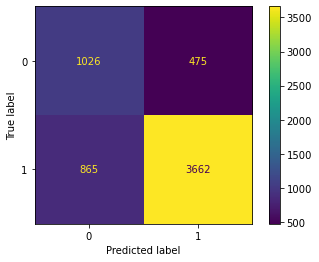

,Accuracy,Precision,Recall,F1
0,0.777704,0.885182,0.808924,0.845337


In [252]:
eva_log =evaluate(log_reg_model, X_test_sc, y_test, threshold= optimal_thre) # evaluation of the model
eva_log

#### From the confusion matrix

- Out of 4527 working class people, the model incorrectly predicted that 865 earns > 50k and correctly predicted 3662 earns > 50k

- There are 1501 who earn > 50k and the model is wrongly predicting that 475 of them earns <=50k salary

- Precision: Out of the number of people the model predicted to earn <=50k only 89% earns >50k

- Recall: Out of all the people in the data that earns <=50k the model predicted 81% correctly

#### Model Improvement
- Model Hyperparameters

- Here we rebuild the model when we get the optimal accuracy

In [253]:
c_values = np.random.rand(5,2).flatten()# the default value of c is 1, 

accs = []
for c in c_values:
    model = LogisticRegression(C=c)
    model.fit(X_train_val_sc, y_train_val)
    acc = model.score(X_test_sc, y_test)
    accs.append(acc)

In [254]:
# accs

In [255]:
optimal_idx = np.argmax(accs)

optimal_c = c_values[optimal_idx]

print(f' The optimal value of C = {optimal_c}')

 The optimal value of C = 0.8397843482099013


Trained Accuracy: 0.8072249180871801


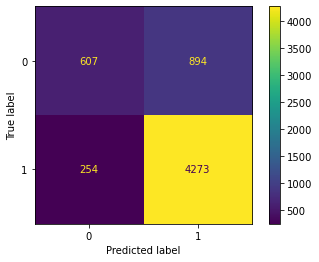

,Accuracy,Precision,Recall,F1
0,0.809555,0.826979,0.943892,0.881576


In [256]:
log_reg_c = LogisticRegression(random_state=0, C = optimal_c)

# calling the training function and evaluate function

log_reg_c_model = train(log_reg_c, X_train_val_sc, y_train_val) 

df_c = evaluate(log_reg_c_model, X_test_sc, y_test)
df_c

#### From the confusion matrix

- Out of 4,527 working class people, the model incorrectly predicted that 254 earns > 50k and correctly predicted 4273 earns <= 50k

- There are 1,501 who earn > 50k and the model is wrongly predicting that 894 of them earns <=50k salary

- Precision: Out of the number of people the model predicted to earn >50k only 83% earns <=50k

- Recall: Out of all the people in the data that earns <=50k the model predicted 94% correctly

#### Model Improvement
- From Data aspect

- Here we rebuild the model when we get the optimal accuracy

In [257]:
# balancing the original data before splitting, 
# only balance the training data to see if it will differentiate from new data
# define a function to balance the data

def balance_data(X,y, smote_type):
    """
    X: Train features
    y: Train target
    smote_type: Kind of imbalance strategy
    """
    
    X_res, y_res = smote_type.fit_resample(X,y) # generating artificial data
    return X_res, y_res

In [258]:
# creating an instance of all the imblearn methods

under = RandomUnderSampler(random_state=0)
over = RandomOverSampler(random_state=0)
smote = SMOTE(random_state=0)
adasyn = ADASYN(random_state=0)

In [259]:
X_train_un,y_train_un = balance_data(X_train_val_sc, y_train_val, under)
X_train_ov,y_train_ov = balance_data(X_train_val_sc, y_train_val, over)
X_train_sm,y_train_sm = balance_data(X_train_val_sc, y_train_val, smote)
X_train_ad,y_train_ad = balance_data(X_train_val_sc, y_train_val, adasyn)


In [260]:
# to count the data target

from collections import Counter

Counter(y_train_un) # now the classes are the same

Counter({0: 6005, 1: 6005})

##### Under Sampling

Trained Accuracy: 0.7457951706910908


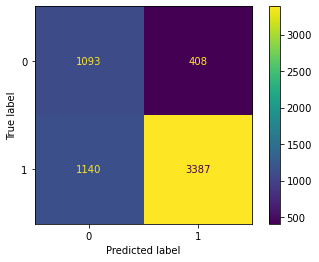

,Accuracy,Precision,Recall,F1
0,0.743198,0.89249,0.748178,0.813987


In [261]:
log_reg_un = train(log_reg,X_train_un,y_train_un)# using the default paramenter

df_un = evaluate(log_reg_un, X_test_sc,y_test) # we maintain the imbalance on the test data

df_un


#### From the confusion matrix

- Out of 4,527 working class people, the model incorrectly predicted that 1140 earns > 50k and correctly predicted 3387 earns <= 50k

- There are 1,501 who earn > 50k and the model is wrongly predicting that 408 of them earns <=50k salary

- Precision: Out of the number of people the model predicted to earn >50k only 89% earns <=50k

- Recall: Out of all the people in the data that earns <=50k the model predicted 75% correctly

##### Over Sampling

In [262]:
Counter(y_train_ov)

Counter({0: 18106, 1: 18106})

Trained Accuracy: 0.7455263448580581


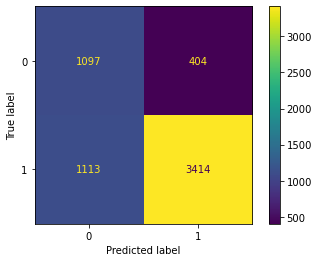

,Accuracy,Precision,Recall,F1
0,0.748341,0.894185,0.754142,0.818214


In [263]:
log_reg_ov = train(log_reg,X_train_ov,y_train_ov)# using the default paramenter

df_ov = evaluate(log_reg_ov, X_test_sc,y_test)

df_ov

#### From the confusion matrix

- Out of 4,527 working class people, the model incorrectly predicted that 1113 earns > 50k and correctly predicted 3414 earns <= 50k

- There are 1,501 who earn > 50k and the model is wrongly predicting that 404 of them earns <=50k salary

- Precision: Out of the number of people the model predicted to earn >50k only 89% earns <=50k

- Recall: Out of all the people in the data that earns <=50k the model predicted 75% correctly

##### SMOTE

In [264]:
Counter(y_train_sm)

Counter({0: 18106, 1: 18106})

Trained Accuracy: 0.744863581133326


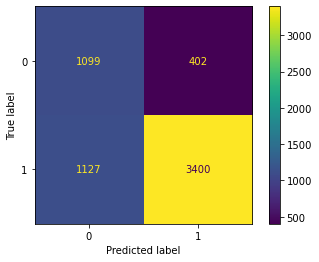

,Accuracy,Precision,Recall,F1
0,0.74635,0.894266,0.751049,0.816425


In [265]:
log_reg_sm = train(log_reg,X_train_sm,y_train_sm)# using the default paramenter

df_sm = evaluate(log_reg_sm, X_test_sc,y_test)

df_sm

#### From the confusion matrix

- Out of 4,527 working class people, the model incorrectly predicted that 1127 earns > 50k and correctly predicted 3400 earns <= 50k

- There are 1,501 who earn > 50k and the model is wrongly predicting that 402 of them earns <=50k salary

- Precision: Out of the number of people the model predicted to earn >50k only 89% earns <=50k

- Recall: Out of all the people in the data that earns <=50k the model predicted 75% correctly

##### ADASYN

In [266]:
Counter(y_train_ad)

Counter({0: 18527, 1: 18106})

Trained Accuracy: 0.7079409275789589


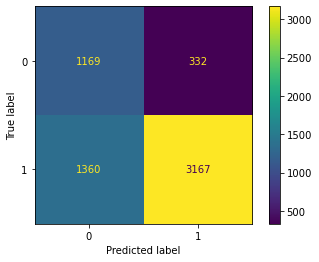

,Accuracy,Precision,Recall,F1
0,0.71931,0.905116,0.69958,0.789185


In [267]:
log_reg_ad = train(log_reg,X_train_ad,y_train_ad)# using the default paramenter

df_ad = evaluate(log_reg_ad, X_test_sc,y_test)

df_ad

#### From the confusion matrix

- Out of 4,527 working class people, the model incorrectly predicted that 1360 earns > 50k and correctly predicted 3167 earns <= 50k

- There are 1,501 who earn > 50k and the model is wrongly predicting that 332 of them earns <=50k salary

- Precision: Out of the number of people the model predicted to earn >50k only 90% earns <=50k

- Recall: Out of all the people in the data that earns <=50k the model predicted 70% correctly

##### CONCLUSION

From the models presented, it can be observed that the model improves at the first model with 94% Recall value and 88 F1% score and the model hyperparater section with the same percentage score and slightly different values for the TPs and FNs

- From the other models presented, the mistakes the model is making are more than the two listed above.
- Some rows were dropped because of the representations of "?", this is because I don't want to assume values and to get results based on the remaining complete data presented

##### RECOMMENDATION

The aim of this analysis is to successfully classify the salary classes for this organization, this is a Non-governmental organization and it's impact are meant to be felt on the appropriate class. It will be more expensive in using models with more wrong classification. I recommend that:
- For cost reduction and good classification the first model with 94% Recall value and 88% F1 score should be adopted. This was able to predict 4274 people that earns less than 50k out of 4507. It has the highest success rate and can be used to address the problem of classification faced by the NGO.